In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:


# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [3]:


print("Original Data:")
print(X[:5])


Original Data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [4]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

In [5]:
# Fit and transform the data
X_normalized = scaler.fit_transform(X)

print("\nNormalized Data:")
print(X_normalized[:5])



Normalized Data:
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [9]:
# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
# Evaluate the classifier
accuracy = knn.score(X_test, y_test)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 1.0


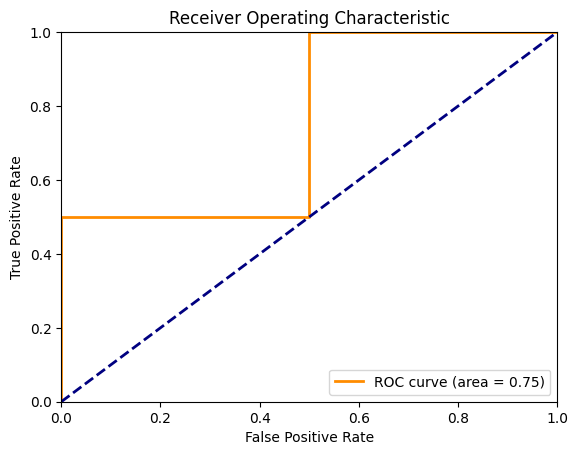

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Sample data
y_true = [0, 0, 1, 1]
y_scores = [0.1, 0.4, 0.35, 0.8]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
